In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,log_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from tqdm import tqdm_notebook

In [2]:
class SigmoidNeuron():

    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self,x):
        return np.dot(x,self.w.T) + self.b
    
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    
    def grad_w_mse(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x
    
    def grad_b_mse(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)
    
    def grad_w_bce(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred * x
        elif y == 1:
            return -1 * (1 - y_pred) * x
        else:
            raise ValueError('y should be 0 or 1')
    
    def grad_b_bce(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred 
        elif y == 1:
            return -1 * (1 - y_pred)
        else:
            raise ValueError('y should be 0 or 1')
    
    def fit(self, X, Y ,epochs = 1, lr = 1, initialize = True, loss_fn = 'mse', display_loss = True):
        if initialize:
            self.w = np.random.randn(1,X.shape[1])
            self.b = 0

        if display_loss:
            loss = {}
        
        for i in tqdm_notebook(range(epochs),total = epochs,unit = "epoch"):
            dw = 0
            db = 0
            for x,y in zip(X,Y):
                if loss_fn == "mse":
                    dw += self.grad_w_mse(x,y)
                    db += self.grad_b_mse(x,y)
                elif loss_fn == "bce":
                    dw += self.grad_w_bce(x,y)
                    db += self.grad_b_bce(x,y)
            m = X.shape[1]
            self.w -= lr * dw/m
            self.b -= lr * db/m

            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                if loss_fn == "mse":
                    loss[i] = mean_squared_error(Y,Y_pred)
                elif loss_fn == "bce":
                    loss[i] = log_loss(Y,Y_pred)
        
        if display_loss:
            key,values = zip(*sorted(loss.items()))
            plt.plot(key,values)
            plt.xlabel('Epochs')
            if loss_fn == "mse":
                plt.ylabel('Mean Squared Error')
            elif loss_fn == "bce":
                plt.yalebl("Cross Entropy Loss")
            plt.show()
        
    def predict(self,X):
        Y_pred = []
        for x in X:
            y = self.sigmoid(self.perceptron(x))
            Y_pred.append(y)
        return np.array(Y_pred)


In [3]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

# Genrating data

In [4]:
data,labels = make_blobs(n_samples = 1000,centers = 4,n_features = 2,random_state = 0)

In [5]:
print(data.shape,labels.shape)

(1000, 2) (1000,)


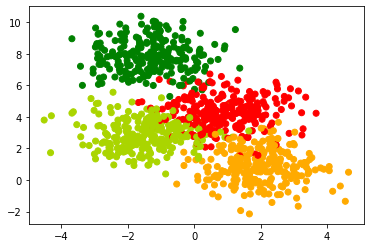

In [6]:
plt.scatter(data[:,0],data[:,1],c = labels,cmap = my_cmap)
plt.show()

In [7]:
labels_orig = labels
labels = np.mod(labels_orig,2)

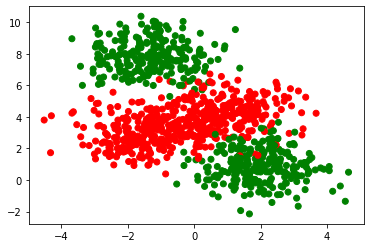

In [8]:
plt.scatter(data[:,0],data[:,1],c = labels,cmap = my_cmap)
plt.show()

In [9]:
x_train,x_val,y_train,y_val = train_test_split(data,labels,stratify = labels,random_state = 0,test_size=0.2)
print(x_train.shape,x_val.shape)

(800, 2) (200, 2)


# Classification with sigmoid neuron

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1000 [00:00<?, ?epoch/s]

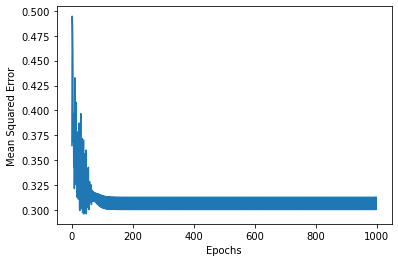

In [10]:
sn = SigmoidNeuron()
sn.fit(x_train,y_train,epochs = 1000,lr = 0.1)

In [11]:
y_pred_train = sn.predict(x_train)
y_pred_binarized_train = (y_pred_train >= 0.5).astype(int).ravel()
y_pred_val = sn.predict(x_val)
y_pred_binarized_val = (y_pred_val >= 0.5).astype(int).ravel()
accuracy_train = accuracy_score(y_pred_binarized_train,y_train)
accuracy_val = accuracy_score(y_pred_binarized_val,y_val)

print("Trainig accuracy", round(accuracy_train,2))
print("Validation accuracy", round(accuracy_val,2))

Trainig accuracy 0.65
Validation accuracy 0.57


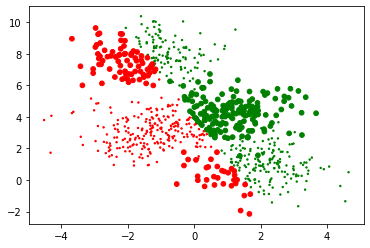

In [12]:
plt.scatter(x_train[:,0],x_train[:,1],c = y_pred_binarized_train,cmap = my_cmap,s = 20 * (np.abs(y_pred_binarized_train - y_train) + 0.1))
plt.show()

# Classification using FFN

In [13]:
class feedforwardnn():

    def __init__(self):
        np.random.seed(0)
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
    
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    
    def forward_pass(self,x):
        self.x1,self.x2 = x
        self.a1 = (self.w1 * self.x1) + (self.w2 * self.x2) + self.b1
        self.h1 = self.sigmoid(self.a1)
        self.a2 = (self.w3 * self.x1) + (self.w4 * self.x2) + self.b2
        self.h2 = self.sigmoid(self.a2)
        self.a3 = (self.w5 * self.h1) + (self.w6 * self.h2) + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3
    
    def grad(self,x,y):
        self.forward_pass(x)

        self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
        self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
        self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
        self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
        self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
        self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
  
        self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
        self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
        self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
    
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False, display_weight=False):

        if initialise:
            np.random.seed(0)
            self.w1 = np.random.randn()
            self.w2 = np.random.randn()
            self.w3 = np.random.randn()
            self.w4 = np.random.randn()
            self.w5 = np.random.randn()
            self.w6 = np.random.randn()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0
        
        if display_loss:
            loss = {}
        
        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
            for x, y in zip(X, Y):
                self.grad(x, y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
                
            m = X.shape[1]
            self.w1 -= learning_rate * dw1 / m
            self.w2 -= learning_rate * dw2 / m
            self.w3 -= learning_rate * dw3 / m
            self.w4 -= learning_rate * dw4 / m
            self.w5 -= learning_rate * dw5 / m
            self.w6 -= learning_rate * dw6 / m
            self.b1 -= learning_rate * db1 / m
            self.b2 -= learning_rate * db2 / m
            self.b3 -= learning_rate * db3 / m

            if display_loss:
                Y_pred = self.predict(X)
                loss[i] = mean_squared_error(Y_pred, Y)
        
            # if display_weight:
            #     weight_matrix = np.array([[0, self.b3, self.w5, self.w6, 0, 0], [self.b1, self.w1, self.w2, self.b2, self.w3, self.w4]])
            #     weight_matrices.append(weight_matrix)
    
        if display_loss:
            key,values = zip(*sorted(loss.items()))
            plt.plot(key,values)
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
      
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred)

    # def predict_h1(self, X):
    #     Y_pred = []
    #     for x in X:
    #         y_pred = self.forward_pass(x)
    #         Y_pred.append(self.h1)
    #     return np.array(Y_pred)
    
    # def predict_h2(self, X):
    #     Y_pred = []
    #     for x in X:
    #         y_pred = self.forward_pass(x)
    #         Y_pred.append(self.h2)
    #     return np.array(Y_pred)
    
    # def predict_h3(self, X):
    #     Y_pred = []
    #     for x in X:
    #         y_pred = self.forward_pass(x)
    #         Y_pred.append(self.h3)
    #     return np.array(Y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/2000 [00:00<?, ?epoch/s]

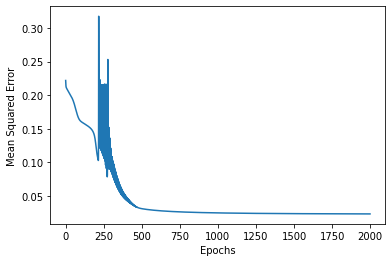

In [14]:
ffn = feedforwardnn()
ffn.fit(x_train,y_train,epochs = 2000,learning_rate = 0.01,display_loss = True)

In [15]:
y_pred_train = ffn.predict(x_train)
y_pred_binarized_train = (y_pred_train >= 0.5).astype(int).ravel()
y_pred_val = ffn.predict(x_val)
y_pred_binarized_val = (y_pred_val >= 0.5).astype(int).ravel()
accuracy_train = accuracy_score(y_pred_binarized_train,y_train)
accuracy_val = accuracy_score(y_pred_binarized_val,y_val)

print("Trainig accuracy", round(accuracy_train,2))
print("Validation accuracy", round(accuracy_val,2))

Trainig accuracy 0.97
Validation accuracy 0.94


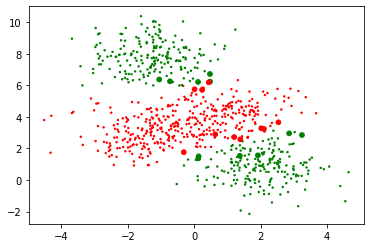

In [16]:
plt.scatter(x_train[:,0],x_train[:,1],c = y_pred_binarized_train,cmap = my_cmap,s = 20 * (np.abs(y_pred_binarized_train - y_train) + 0.1))
plt.show()

In [17]:
class FFNeuralNet():
    def __init__(self,in_sz,hidden_layers = [2]):
        self.nx = in_sz
        self.ny = 1
        self.nh = len(hidden_layers)
        self.sizes = [self.nx] + hidden_layers + [self.ny]

        self.W = {}
        self.B = {}

        for i in range(self.nh + 1):
            self.W[i + 1] = np.random.randn(self.sizes[i],self.sizes[i+1])
            self.B[i + 1] = np.zeros((1,self.sizes[i+1]))
    
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    
    def forward_pass(self,x):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1,-1)
        for i in range(self.nh + 1):
            self.A[i+1] = np.matmul(self.H[i],self.W[i+1]) + self.B[i+1]
            self.H[i+1] = self.sigmoid(self.A[i+1])

        return self.H[self.nh + 1] 
    
    def grad_sigmoid(self,x):
        return x * (1 - x)
    
    def grad(self,x,y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dA = {}
        self.dH = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L,0,-1):
            self.dW[k] = np.matmul(self.H[k-1].T,self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k],self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1],self.grad_sigmoid(self.A[k-1]))
    
    def fit(self,X,Y,epochs = 1,learning_rate = 1,initialise = True,display_loss = False):
        if initialise:
            for i in range(self.nh + 1):
                self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1])
                self.B[i+1] = np.zeros((1,self.sizes[i+1]))
        
        if display_loss:
            loss = {}
        
        for e in tqdm_notebook(range(epochs),total = epochs,unit = "epoch"):
            dW = {}
            dB = {}
            for i in range(self.nh + 1):
                dW[i+1] = np.zeros((self.sizes[i],self.sizes[i+1]))
                dB[i+1] = np.zeros((1,self.sizes[i+1]))

            for x,y in zip(X,Y):
                self.grad(x,y)
                for i in range(self.nh + 1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]

            for i in range(self.nh + 1):
                m = X.shape[1]
                self.W[i+1] -= learning_rate * dW[i+1]/m
                self.B[i+1] -= learning_rate * dB[i+1]/m

            if display_loss:
                Y_pred = self.predict(X)
                loss[e] = mean_squared_error(Y_pred,Y)

        if display_loss:
            key,values = zip(*sorted(loss.items()))
            plt.plot(key,values)
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
        
    def predict(self,X):
        Y_pred = []
        for x in X:
            y = self.forwaard_pass(x)
            y.append(y)
        return np.array(y).squeeze()

In [18]:
ffn = FFNeuralNet(2,[2,3])
ffn.fit(x_train,y_train,epochs = 1000,learning_rate = 0.01,display_loss = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1000 [00:00<?, ?epoch/s]

KeyError: ignored